<a href="https://colab.research.google.com/github/Legacy560/MLTSA25_RWolynetz/blob/main/labs/Using_Gemini_in_Colab_RWolynetz_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import statsmodels.api as sm
import seaborn as sns



In [ ]:
# prompt: read the data at https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/refs/heads/main/data/consumptionUS.csv into a pandas dataframe

import pandas as pd
consumption_df = pd.read_csv('https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/refs/heads/main/data/consumptionUS.csv')
consumption_df



,year,income,consumption,production,unemployment,savings
0,1970.00,1.026164,0.515488,-2.301594,-24.013389,-12.860000
1,1970.25,1.321423,0.667464,-0.971319,-25.716675,-12.707256
2,1970.50,1.165145,0.102766,-0.392985,-25.743479,-12.752851
3,1970.75,0.502112,-0.132854,-2.179090,-25.396463,-13.277377
4,1971.00,1.880158,1.563505,0.976772,-28.159259,-13.033525
...,...,...,...,...,...,...
181,2015.25,0.742163,0.651337,-0.464605,-28.634280,-12.920307
182,2015.50,0.808291,0.607343,0.128754,-29.523084,-12.973597
183,2015.75,0.697304,0.508611,-0.628269,-28.408732,-12.956514
184,2016.00,0.479744,0.427022,-0.382036,-28.118906,-13.123471


In [ ]:
df.describe() #There's no missing data

,year,income,consumption,production,unemployment,savings
count,186.00000,186.000000,186.000000,186.000000,186.000000,186.000000
mean,1993.12500,0.669221,0.713143,0.506816,-28.143260,-13.225574
std,13.45943,0.763883,0.582033,1.441115,1.663795,1.005263
min,1970.00000,-3.320112,-2.037942,-6.551892,-32.354818,-18.113481
25%,1981.56250,0.343154,0.397572,0.120717,-29.066742,-13.617136
50%,1993.12500,0.696175,0.761837,0.694020,-28.478698,-13.171509
75%,2004.68750,1.040326,1.062793,1.311983,-27.561412,-12.788312
max,2016.25000,3.212159,2.027060,3.617150,-21.518999,-9.705503


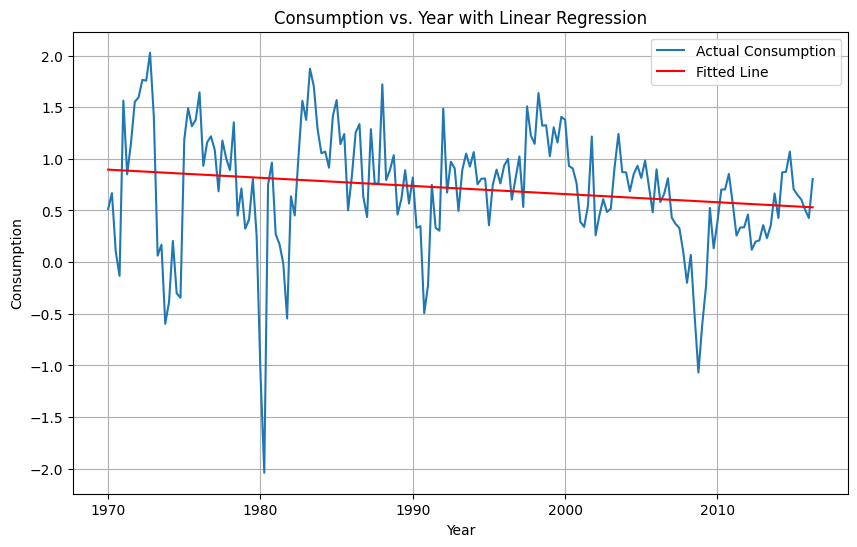

Intercept: 16.431879334502522
Coefficient: -0.00788647792174552


In [ ]:
# prompt: using consumption_df, fit a line to consumption vs time with sklearn and plot the result including fitting the intercept.

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import statsmodels.api as sm
import seaborn as sns

# Assuming consumption_df is already loaded as in the previous code

# Prepare the data
X = consumption_df['year'].values.reshape(-1, 1)  # Reshape for sklearn
y = consumption_df['consumption'].values

# Fit the linear regression model with intercept
model = LinearRegression(fit_intercept=True)
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(X, y, label='Actual Consumption')
plt.plot(X, y_pred, color='red', label='Fitted Line')
plt.xlabel('Year')
plt.ylabel('Consumption')
plt.title('Consumption vs. Year with Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")


In [ ]:
model.coef_

array([-0.00788648])

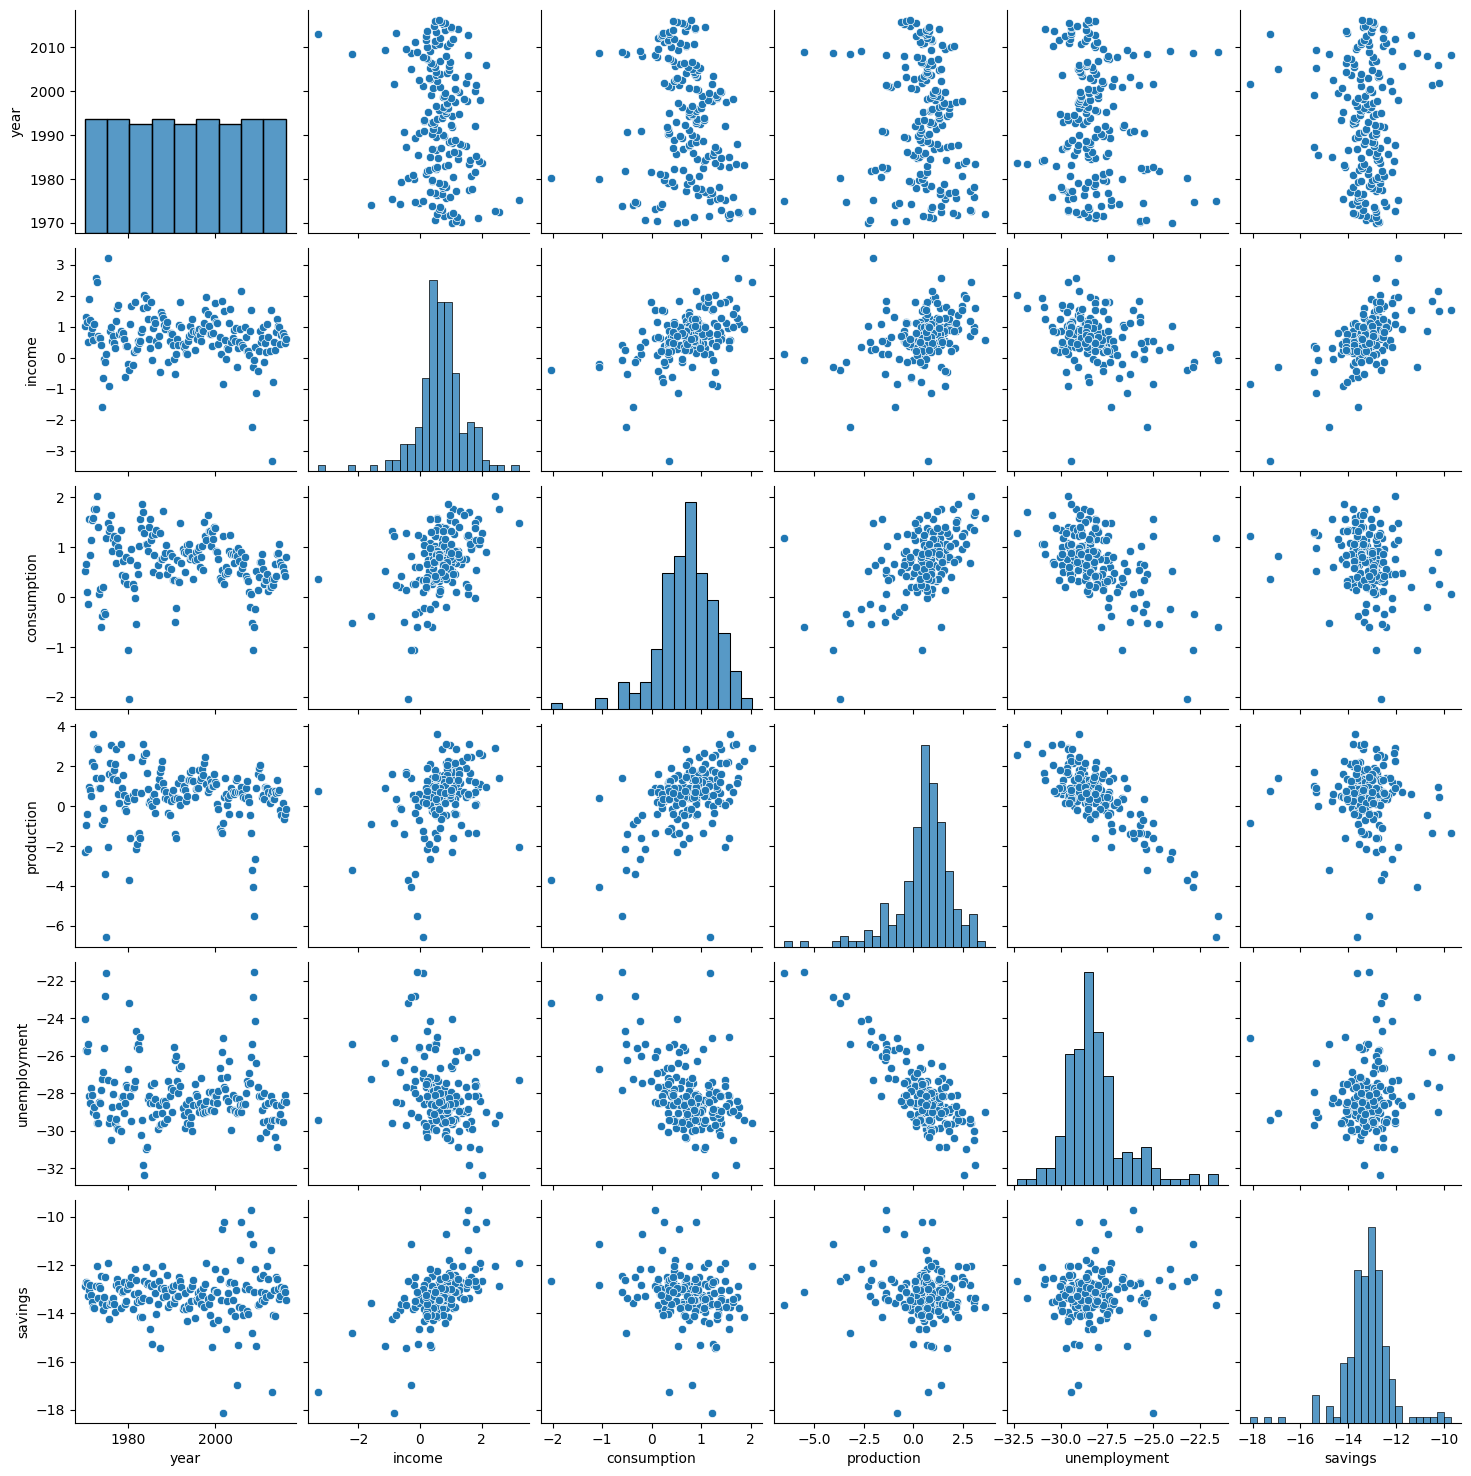

In [ ]:
# prompt: show the correlation of all variables with one another with a pair plot

import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(consumption_df)
plt.show()


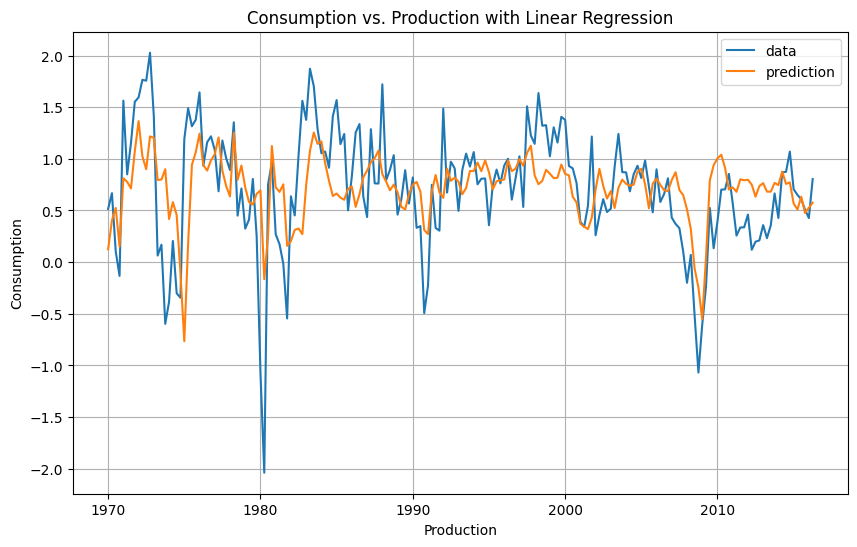

Intercept: 0.6069726075699374
Coefficient: 0.2094852360479503


In [ ]:
# prompt: using consumption_df, fit a line to consumption vs production with sklearn and plot the result including fitting the intercept.

import matplotlib.pyplot as plt
# Assuming consumption_df is already loaded as in the previous code

# Prepare the data
X = consumption_df['production'].values.reshape(-1, 1)  # Use 'production'
y = consumption_df['consumption'].values

# Fit the linear regression model with intercept
model = LinearRegression(fit_intercept=True)
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Plot the results
plt.figure(figsize=(10, 6))
#plt.plot(X, y, label='Actual Consumption')  # Use scatter plot for better visualization
plt.plot(consumption_df["year"], consumption_df["consumption"], label = "data")
plt.plot(consumption_df["year"], y_pred, label = "prediction")

#plt.plot(X, y_pred, color='red', label='Fitted Line')
plt.xlabel('Production')  # Change x-axis label
plt.ylabel('Consumption')
plt.title('Consumption vs. Production with Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")


Notice that the drops are just to the left of the predictions. This is because production trails consumption.

In [ ]:
consumption_df.columns

Index(['year', 'income', 'consumption', 'production', 'unemployment',
       'savings'],
      dtype='object')

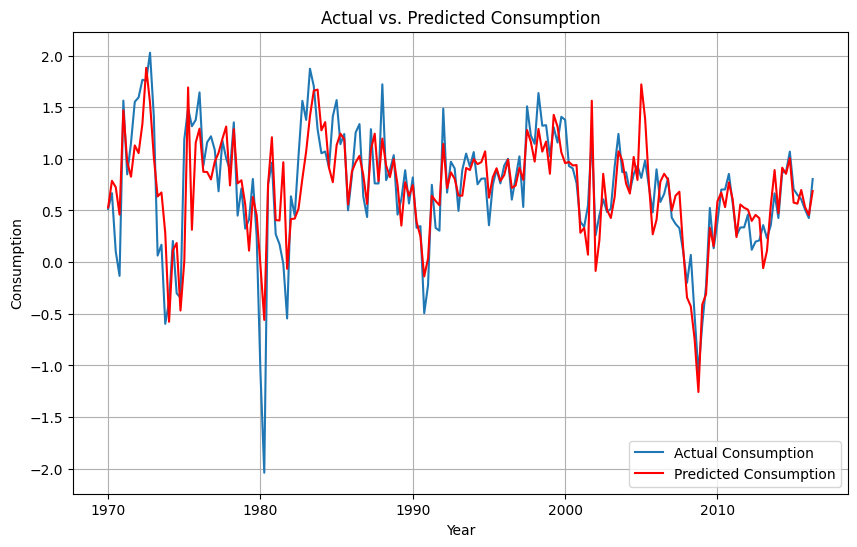

Sum of Squared Errors (SSE): 19.777434541058756
Coefficients: [-0.0030505   0.62354877  0.02758858 -0.059783   -0.41759525]
Intercept: -0.8435373026689411


In [ ]:
# prompt: fit a multilinear model with sklearn to consumption_df  predicting consumption and plot the true value of consumption and the prediction over time. Also show the sum of squared errors.

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming consumption_df is already loaded as in the previous code
# ... (your existing code to load consumption_df)

# Prepare the data
X = consumption_df[['year', 'income', 'production', 'unemployment',
       'savings']]  # Use both 'year' and 'production'
y = consumption_df['consumption']

# Fit the multiple linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate the Sum of Squared Errors (SSE)
sse = mean_squared_error(y, y_pred) * len(y)


# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(consumption_df['year'], y, label='Actual Consumption')
plt.plot(consumption_df['year'], y_pred, color='red', label='Predicted Consumption')
plt.xlabel('Year')
plt.ylabel('Consumption')
plt.title('Actual vs. Predicted Consumption')
plt.legend()
plt.grid(True)
plt.show()

print(f"Sum of Squared Errors (SSE): {sse}")
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
